# DATASET CRYPTO
Abel Stanley - 13517068 <br>
Samantha Olivia Tandri - 13517123

**Dependecies:**

In [6]:
import numpy 
import pandas as pandas
import math
import matplotlib.pyplot as plotter
from scipy.stats import gamma

**Import relevant dataset:**

In [7]:
dataframe = pandas.read_csv("crypto.csv",delimiter=',', encoding="utf-8-sig", header= None)

### **<<<<<<<<<<<<<<<<<<<<<<<<<< Describing Dataset <<<<<<<<<<<<<<<<<<<<<<<<<<**

In [4]:
print("-------------------------------Data Description-------------------------------\n")
dataframe.describe(include = 'all')


-------------------------------Data Description-------------------------------



0
count  6.322180e+05
mean   2.030181e+02
std    8.678734e+03
min    2.925000e-09
25%    8.070000e-04
50%    9.733500e-03
75%    1.198202e-01
max    2.383502e+06

In [5]:
mean = dataframe.mean().values[0]
cth = len(dataframe[dataframe<=mean])
cth2 = len(dataframe[dataframe>=mean])
print(mean)
print(cth)
print(cth2)

203.01814563577895
632218
632218


In [6]:
# Max:
print("\n------------------------------------Max:-------------------------------------\n")
print( "Crypto Max: ", dataframe.max().values[0])
# Min:
print("\n------------------------------------Min:-------------------------------------\n")
print( "Crypto Min: ", dataframe.min().values[0])
# Mean:
print("\n------------------------------------Mean:------------------------------------\n")
print( "Crypto Mean: ", dataframe.mean().values[0])
# Standard Deviation:
print("\n-----------------------------Standard Deviation:-----------------------------\n")
print( "Crypto Standard Deviation: ", dataframe.std().values[0])
# Mode:
print("\n-----------------------------------Mode:-------------------------------------\n")
print("From the whole dataset  : \n", dataframe[dataframe.columns[0]].mode().values[0] )
# Median:
print("\n-------------------------Median for Numeric Columns:-------------------------\n")
print("Crypto Median: ", dataframe.median().values[0])
# Variance:
print("\n---------------------------------Variance:-----------------------------------\n")
print("Crypto Variance :", dataframe.var().values[0] )
# Kurtosis:
print("\n---------------------------------Kurtosis:-----------------------------------\n")
print("Crypto Kurtosis :", dataframe.kurtosis().values[0] ) #use .values to remove dtype messCrypto
# Skew:
print("\n-----------------------------------Skew:-------------------------------------\n")
print("Crypto Skewness:", dataframe.skew().values[0] ) #use .values to remove dtype messCrypto



------------------------------------Max:-------------------------------------

Crypto Max:  2383502.5

------------------------------------Min:-------------------------------------

Crypto Min:  2.9249999999999997e-09

------------------------------------Mean:------------------------------------

Crypto Mean:  203.01814563577895

-----------------------------Standard Deviation:-----------------------------

Crypto Standard Deviation:  8678.733502775522

-----------------------------------Mode:-------------------------------------

From the whole dataset  : 
 2e-06

-------------------------Median for Numeric Columns:-------------------------

Crypto Median:  0.0097335

---------------------------------Variance:-----------------------------------

Crypto Variance : 75320415.21219827

---------------------------------Kurtosis:-----------------------------------

Crypto Kurtosis : 22297.470842872517

-----------------------------------Skew:-------------------------------------

Crypto Sk

### **<<<<<<<<<<<<<<<<<<<<<<< Plot Histogram for dataset >>>>>>>>>>>>>>>>>>>>>>>** <br>
*-----------------------------------------------1. Crypto Histogram:-----------------------------------------------*

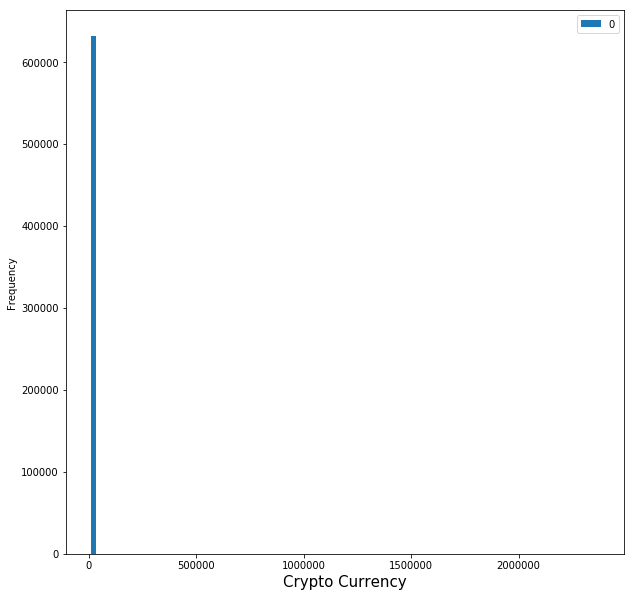

<Figure size 432x288 with 0 Axes>

In [7]:
# Determines what to plot in the chart:
dataframe.plot(kind="hist", rwidth =0.5, figsize =(10,10), bins = 50)

# Customizing the chart:
plotter.xlabel("Crypto Currency", fontsize=15)
# Show the chart:
plotter.show()
# Reset the plotter:
plotter.clf()

### **<<<<<<<<<<<<<<<<<<<<<<<<<< Plot Box for Dataset  >>>>>>>>>>>>>>>>>>>>>>>>>>**

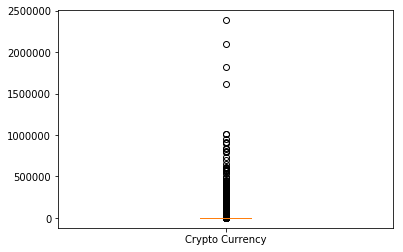

<Figure size 432x288 with 0 Axes>

In [27]:
# Determines what to plot in the chart:
    # Box plot only accepts numeric types, so convert to int first:
CryptoListString = dataframe[dataframe.columns[0]].values.tolist()
CryptoListInt = [ int(x) for x in CryptoListString ]
boxplotData = [CryptoListInt]
# Customizing the chart:
plotter.xlabel("", fontsize=15)
plotter.boxplot(boxplotData,patch_artist=True,labels=["Crypto Currency"])
# Show the chart:
plotter.show()
# Reset the plotter:
plotter.clf()

### **<<<<<<<<<<<<<<<<<<<<<< Answering Question Problems >>>>>>>>>>>>>>>>>>>>>>**

### Q1.

**a.**

In [30]:
beta = dataframe.var() / dataframe.mean()
alpha = dataframe.mean() / beta
cdf = gamma.cdf(0.177013, a=alpha, scale=beta)[0]
res1 = cdf * 1000
print("Ekspektasi jumlah cryptocurrency yang nilainya kurang dari 0.177013 : ",math.floor(res1))

Ekspektasi jumlah cryptocurrency yang nilainya kurang dari 0.177013 :  992


**b.**

In [31]:
cdf = gamma.cdf(177.013, a=alpha, scale=beta)[0]
complement = 1-cdf
res2 = complement * 1000
print("Ekspektasi jumlah cryptocurrency yang nilainya lebih dari 177.013: ",math.floor(res2))

Ekspektasi jumlah cryptocurrency yang nilainya lebih dari 177.013:  3


### Q2.

**a.**

In [16]:
cdf = gamma.cdf(0.013, a=alpha, scale=beta)[0]
complement = 1-cdf
res3 = complement
print("Peluang cryptocurrency yang nilainya lebih dari 0.013: ",res3)

Peluang cryptocurrency yang nilainya lebih dari 0.013:  0.009037196715192874


**b.**

In [18]:
cdf = gamma.cdf(17.7, a=alpha, scale=beta)[0]
res4 = cdf
print("Peluang cryptocurrency yang nilainya kurang dari 17.7: ",res4)

Peluang cryptocurrency yang nilainya kurang dari 17.7:  0.9948837242503554


### PENJELASAN

Pada kasus ini, lebih tepat digunakan distribusi gamma.
    
**ALASAN:**
Persebaran data bersifat kontinu. Sehingga pilihan terbatas menjadi: <br>
*Normal, Chi-squared, gamma, beta, weibull, lognormal, etc.* <br>
<br>
Untuk kasus ini, grafik histogram menunjukkan bahwa pembagian data tidak rata. Variance dari
persebaran data sangat besar. Outlier dari data terletak di bagian positives. Dari kasus ini,
kemungkinan yang tersisa adalah distribusi: <br>
*Eksponensial, Gamma, Lognormal, dan Weibull.* <br>
<br>
Namun setelah dihitung alpha, ternyata alpha tidak bernilai 1 sehingga distribusi eksponensial
tidak mungkin. <br>
<br>
Karena distribusi gamma, lognormal, dan weibull cocok untuk kasus distribusi ini dan interchangeable, kami memilih salah 
satu, yaitu distribusi gamma. <br>